### We are just going to setup the data and import the packages that we will be using.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [108]:
X_test = pd.read_csv('test.csv')
X_train=pd.read_csv('train.csv')
Y_train=pd.read_csv('train_labels.csv')

### From the data let us look at what two differnt action states trend towards. 

In [89]:
sequence_0=X_train.loc[X_train['sequence']==0]
sequence_1=X_train.loc[X_train['sequence']==1]
Features=['sensor_00','sensor_01','sensor_02','sensor_03','sensor_04','sensor_05','sensor_06','sensor_07','sensor_08','sensor_09','sensor_10','sensor_11','sensor_12']

sensor_00


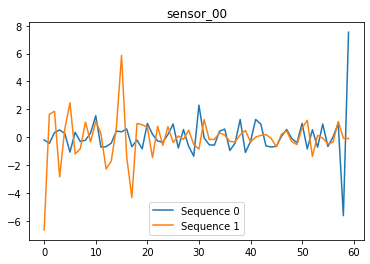

sensor_01


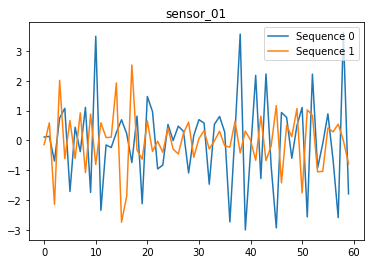

sensor_02


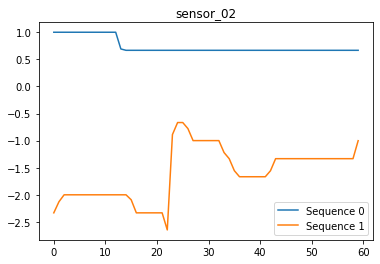

sensor_03


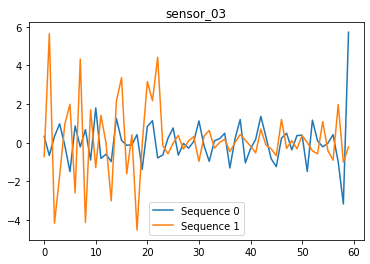

sensor_04


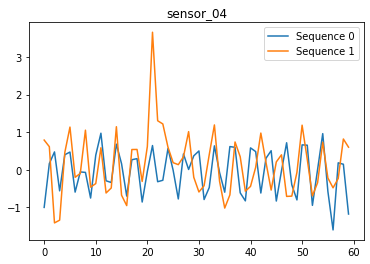

sensor_05


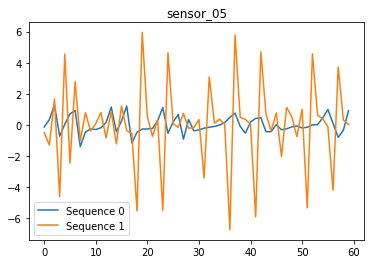

sensor_06


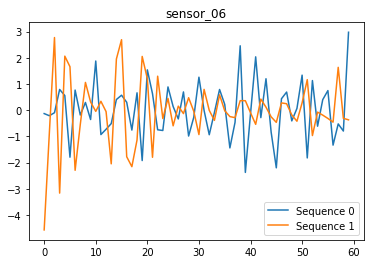

sensor_07


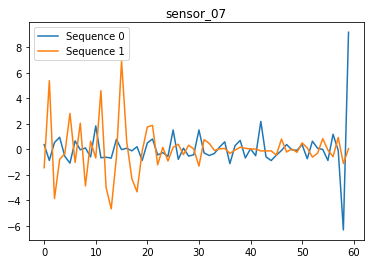

sensor_08


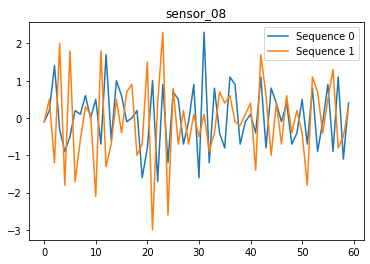

sensor_09


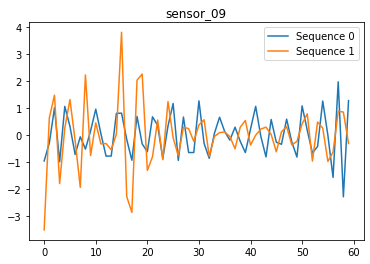

sensor_10


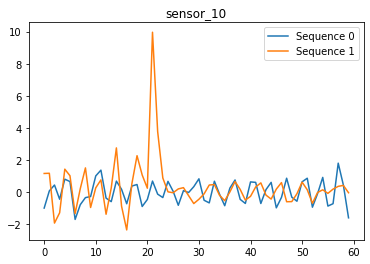

sensor_11


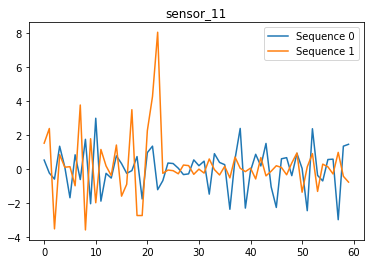

sensor_12


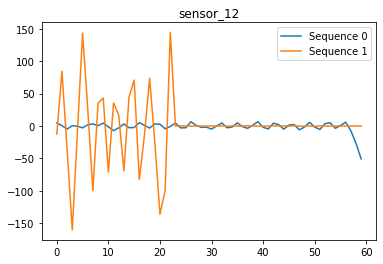

In [119]:

for Feature in Features:
    print(Feature)
    plt.plot(list(range(0,60)),np.array(sequence_0[Feature]),label='Sequence 0')
    plt.plot(list(range(0,60)),np.array(sequence_1[Feature]),label='Sequence 1')
    plt.legend()
    plt.title(Feature)
    plt.show()

### Now we move on towards preprocessing the data to fit LSTM. I will only be using 100 sequenes because of memory

In [101]:
#It must be in samples, time step, features size
XTrain=np.empty((100,60,16))

for i in range(100):
    sequence=[np.array(X_train.loc[X_train['sequence']==i])]
    XTrain+=sequence
            
XTrain.shape

(100, 60, 16)

In [115]:
#Changing the the test data and the output training data into correct format
YTrain=Y_train['state']
YTrain=YTrain[:100]
YTrain.shape

(100,)

In [117]:
#Also Testing on 100 sequences
XTest=np.empty((100,60,16))

for i in range(100):
    sequence=[np.array(X_test.loc[X_train['sequence']==i])]
    XTest+=sequence
            
XTest.shape

(100, 60, 16)